# Logistics Regression - BMD Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing CSV

In [2]:
bmd = pd.read_csv('../../bmd/bmd.csv')

In [3]:
bmd.head()

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909


# Analyzing numeric columns

In [4]:
bmd.describe()

,id,age,weight_kg,height_cm,waiting_time,bmd
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,9102.556213,63.631531,64.665680,160.254438,19.739645,0.783104
std,8744.623598,12.356936,11.537171,7.928272,15.800570,0.166529
min,35.000000,35.814058,36.000000,142.000000,5.000000,0.407600
25%,2018.000000,54.424211,56.000000,154.000000,9.000000,0.670800
50%,6702.000000,63.487837,64.500000,160.500000,14.000000,0.786100
75%,17100.000000,72.080558,73.000000,166.000000,24.000000,0.888800
max,24208.000000,88.753795,96.000000,177.000000,96.000000,1.362400


In [5]:
bmd.groupby('fracture').mean()

# id: To be removed
# Age: The oldest you get, the biggest the probability to fracture.
# Weight: A higher weight helps preventing a fracture.
# Height: It does not really impact.
# Waiting time (time the patient had to wait for the densitometry (in minutes): the longest the time, the more probability to fracture.
# Bdm (bone mineral density): The most dense your bones ares, the less likely they are to fracture.

,id,age,weight_kg,height_cm,waiting_time,bmd
fracture,,,,,,
fracture,7869.040000,69.771320,58.410000,159.290000,23.300000,0.623308
no fracture,9620.840336,61.051787,67.294118,160.659664,18.243697,0.850245


# Analyzing string columns

In [6]:
cross_sex = pd.crosstab(bmd['fracture'], bmd['sex'])
cross_sex

# There is not a lot of difference between Men and Women

sex,F,M
fracture,,
fracture,25,25
no fracture,58,61


In [7]:
Female_Fracture = cross_sex['F']['fracture'] / (cross_sex['F']['fracture']  + cross_sex['F']['no fracture'])
Female_Fracture

0.30120481927710846

In [8]:
Male_Fracture = cross_sex['M']['fracture'] / (cross_sex['M']['fracture']  + cross_sex['M']['no fracture'])
Male_Fracture

0.29069767441860467

In [9]:
cross_med = pd.crosstab(bmd['fracture'], bmd['medication'])
cross_med

# Medication prevents fractures, especially for Gluco. For Anticonvulsant there are not many cases.

medication,Anticonvulsant,Glucocorticoids,No medication
fracture,,,
fracture,4,5,41
no fracture,5,19,95


In [10]:
Anticonvulsant_fracture = cross_med['Anticonvulsant']['fracture'] / (cross_med['Anticonvulsant']['fracture']  
+ cross_med['Anticonvulsant']['no fracture'])

Anticonvulsant_fracture

0.4444444444444444

In [11]:
Glucocorticoids_fracture = cross_med['Glucocorticoids']['fracture'] / (cross_med['Glucocorticoids']['fracture']  
+ cross_med['Glucocorticoids']['no fracture'])

Glucocorticoids_fracture

0.20833333333333334

In [12]:
No_medication_fracture = cross_med['No medication']['fracture'] / (cross_med['No medication']['fracture']  
+ cross_med['No medication']['no fracture'])

No_medication_fracture

0.3014705882352941

# Removing columns "id" and sending "fracture" column to the end.

In [13]:
cols = bmd.columns.values.tolist()
cols

['id',
 'age',
 'sex',
 'fracture',
 'weight_kg',
 'height_cm',
 'medication',
 'waiting_time',
 'bmd']

In [14]:
cols_new = ['age',
 'sex',
 'weight_kg',
 'height_cm',
 'medication',
 'waiting_time',
 'bmd',
 'fracture']

In [15]:
bmd = bmd[cols_new]

In [16]:
dum_sex = pd.get_dummies(bmd['sex'], prefix = 'sex')
new_bmd = bmd.join(dum_sex)

In [17]:
dum_med = pd.get_dummies(new_bmd['medication'], prefix = 'medication')
new_bmd = new_bmd.join(dum_med)
new_bmd.head(3)

,age,sex,weight_kg,height_cm,medication,waiting_time,bmd,fracture,sex_F,sex_M,medication_Anticonvulsant,medication_Glucocorticoids,medication_No medication
0,57.052768,F,64.0,155.5,Anticonvulsant,18,0.8793,no fracture,1,0,1,0,0
1,75.741225,F,78.0,162.0,No medication,56,0.7946,no fracture,1,0,0,0,1
2,70.778900,M,73.0,170.5,No medication,10,0.9067,no fracture,0,1,0,0,1


In [18]:
cols = new_bmd.columns.values.tolist()
cols

['age',
 'sex',
 'weight_kg',
 'height_cm',
 'medication',
 'waiting_time',
 'bmd',
 'fracture',
 'sex_F',
 'sex_M',
 'medication_Anticonvulsant',
 'medication_Glucocorticoids',
 'medication_No medication']

In [19]:
cols_new = ['age',
 'weight_kg',
 'height_cm',
 'waiting_time',
 'bmd',
 'fracture',
 'sex_F',
 'sex_M',
 'medication_Anticonvulsant',
 'medication_Glucocorticoids',
 'medication_No medication']

In [20]:
new_bmd = new_bmd[cols_new]

In [21]:
new_bmd.head(5)

,age,weight_kg,height_cm,waiting_time,bmd,fracture,sex_F,sex_M,medication_Anticonvulsant,medication_Glucocorticoids,medication_No medication
0,57.052768,64.0,155.5,18,0.8793,no fracture,1,0,1,0,0
1,75.741225,78.0,162.0,56,0.7946,no fracture,1,0,0,0,1
2,70.778900,73.0,170.5,10,0.9067,no fracture,0,1,0,0,1
3,78.247175,60.0,148.0,14,0.7112,no fracture,1,0,0,0,1
4,54.191877,55.0,161.0,20,0.7909,no fracture,0,1,0,0,1


In [22]:
# We change the Fracture columns from string to numeric. True=1, False=0.

new_bmd['fracture'] = (new_bmd['fracture'] == 'fracture').astype(int)

In [23]:
new_bmd.head(5)

,age,weight_kg,height_cm,waiting_time,bmd,fracture,sex_F,sex_M,medication_Anticonvulsant,medication_Glucocorticoids,medication_No medication
0,57.052768,64.0,155.5,18,0.8793,0,1,0,1,0,0
1,75.741225,78.0,162.0,56,0.7946,0,1,0,0,0,1
2,70.778900,73.0,170.5,10,0.9067,0,0,1,0,0,1
3,78.247175,60.0,148.0,14,0.7112,0,1,0,0,0,1
4,54.191877,55.0,161.0,20,0.7909,0,0,1,0,0,1


In [24]:
new_bmd.fracture.value_counts()

0    119
1     50
Name: fracture, dtype: int64


# Select columns to build the model

In [25]:
new_bmd.columns.values.tolist()

['age',
 'weight_kg',
 'height_cm',
 'waiting_time',
 'bmd',
 'fracture',
 'sex_F',
 'sex_M',
 'medication_Anticonvulsant',
 'medication_Glucocorticoids',
 'medication_No medication']

In [26]:
X = ['age',
 'weight_kg',
 'height_cm',
 'waiting_time',
 'bmd',
 'sex_F',
 'sex_M',
 'medication_Anticonvulsant',
 'medication_Glucocorticoids',
 'medication_No medication']

Y = ['fracture']

# We put under X the columns to be used as predictors.
# Y is the column we want to predict

# We evaluate dtypes and assign numeric type to them

In [27]:
new_bmd.dtypes

age                           float64
weight_kg                     float64
height_cm                     float64
waiting_time                    int64
bmd                           float64
fracture                        int32
sex_F                           uint8
sex_M                           uint8
medication_Anticonvulsant       uint8
medication_Glucocorticoids      uint8
medication_No medication        uint8
dtype: object

In [28]:
new_bmd['sex_F'] = (new_bmd['sex_F'] == 'sex_F').astype(int)
new_bmd['sex_M'] = (new_bmd['sex_M'] == 'sex_M').astype(int)
new_bmd['medication_Anticonvulsant'] = (new_bmd['medication_Anticonvulsant'] == 'medication_Anticonvulsant').astype(int)
new_bmd['medication_Glucocorticoids'] = (new_bmd['medication_Glucocorticoids'] == 'medication_Glucocorticoids').astype(int)
new_bmd['medication_No medication'] = (new_bmd['medication_No medication'] == 'medication_No medication').astype(int) 
new_bmd.dtypes

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


age                           float64
weight_kg                     float64
height_cm                     float64
waiting_time                    int64
bmd                           float64
fracture                        int32
sex_F                           int32
sex_M                           int32
medication_Anticonvulsant       int32
medication_Glucocorticoids      int32
medication_No medication        int32
dtype: object

# We import the needed libraries and fit

In [29]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [30]:
n = 1

In [31]:
lr = LogisticRegression()

In [32]:
rfe = RFE(lr, n)

In [33]:
rfe = rfe.fit(new_bmd[X], new_bmd[Y])

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
rfe.support_

array([False, False, False, False,  True, False, False, False, False,
       False])

In [35]:
rfe.ranking_
# Ranking allows us to rank the impact of every columns on the final model.

array([ 3,  2,  4,  5,  1, 10,  9,  8,  7,  6])

In [36]:
list(zip(new_bmd[X],rfe.ranking_))

[('age', 3),
 ('weight_kg', 2),
 ('height_cm', 4),
 ('waiting_time', 5),
 ('bmd', 1),
 ('sex_F', 10),
 ('sex_M', 9),
 ('medication_Anticonvulsant', 8),
 ('medication_Glucocorticoids', 7),
 ('medication_No medication', 6)]

# Model Implementation with SKLEARN

In [37]:
from sklearn import linear_model

In [38]:
logit_model = linear_model.LogisticRegression()

In [39]:
logit_model.fit(new_bmd[X], new_bmd[Y])

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
logit_model.score(new_bmd[X], new_bmd[Y])

0.8224852071005917

# Create and Actual vs Prediction column

In [41]:
Actual_and_Prediction = pd.DataFrame(
    {
    'Prediction': logit_model.predict(new_bmd[X]).tolist()
    }
)

In [42]:
Actual_and_Prediction['Actual'] = new_bmd[Y]

In [43]:
Actual_and_Prediction['Result'] = Actual_and_Prediction['Actual'] == Actual_and_Prediction['Prediction']

In [44]:
Actual_and_Prediction.head()

,Prediction,Actual,Result
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True


In [45]:
Actual_and_Prediction['Result'].value_counts()

True     139
False     30
Name: Result, dtype: int64

In [46]:
# Percentage of hits
139 / (30 + 139)

0.8224852071005917

In [47]:
# As seen, Score can be calcaulated as True / (True+False)

# Can the model work with less variables?

In [48]:
# As seen, Gender does not really a big impact on Y. Let's remove the Gender related columns and re run the model.

In [49]:
X = ['age',
 'weight_kg',
 'height_cm',
 'waiting_time',
 'bmd',
 'medication_Anticonvulsant',
 'medication_Glucocorticoids',
 'medication_No medication']

In [50]:
logit_model.fit(new_bmd[X], new_bmd[Y])

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
logit_model.score(new_bmd[X], new_bmd[Y])

# Removing the gender columns has no impact

0.8224852071005917

In [52]:
# Let's now remove the medication fields

In [53]:
X = ['age',
 'weight_kg',
 'height_cm',
 'waiting_time',
 'bmd']

logit_model.fit(new_bmd[X], new_bmd[Y])
logit_model.score(new_bmd[X], new_bmd[Y])

# As we see, if we remove this field, the model losses part of its predictive capabilities.

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8224852071005917

In [54]:
# Let's now remove the waiting time

X = ['age',
'weight_kg',
 'height_cm',
 'bmd']

logit_model.fit(new_bmd[X], new_bmd[Y])
logit_model.score(new_bmd[X], new_bmd[Y])

# As per the result, when removing waiting time, the model losses part of its capabilities.

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8106508875739645

In [55]:
X = [
 'age',
 #'weight_kg',
 #'height_cm',
 'medication_No medication',
 'waiting_time',
 'bmd'
    ]


logit_model.fit(new_bmd[X], new_bmd[Y])
logit_model.score(new_bmd[X], new_bmd[Y])

# We include waiting_time again. 
# We have finally four fields. We can manually check, which fields we can remove to see how we impact the model results.

# Is 84% a good result? Initially, we had a list with 119 cases in which a fracture did not ocurr, and 50 in which it did.
# If we always predict "no fracture", we will be right in 70,4 percent of the cases (1-(50 / (50+119))).

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8402366863905325

In [56]:
Actual_and_Prediction = pd.DataFrame(
    {
    'Prediction': logit_model.predict(new_bmd[X]).tolist()
    }
)

In [57]:
new_bmd['Prediction'] = Actual_and_Prediction['Prediction']
new_bmd['Result'] = new_bmd['fracture'] == new_bmd['Prediction']

In [58]:
new_bmd['Result'].value_counts()

True     142
False     27
Name: Result, dtype: int64

# Validation

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(new_bmd[X], new_bmd[Y], test_size=0.3, random_state=0)

In [61]:
# Length:
print('X_train: ', len(X_train))
print('X_test: ', len(X_test))
print('Y_train: ', len(Y_train))
print('Y_test: ', len(Y_test))

X_train:  118
X_test:  51
Y_train:  118
Y_test:  51


In [62]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)
lm.score(X_train, Y_train)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8389830508474576

In [63]:
probs = lm.predict_proba(X_test)

In [64]:
prediction = lm.predict(X_test)
prediction

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0])

In [65]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.6
prob_df['prediction'] = np.where(prob_df[0] > threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.531768,0
1,0.201424,0
2,0.611834,1
3,0.369244,0
4,0.093150,0


In [66]:
print(len(prob_df[prob_df['prediction']==0])/ len(prob_df))

0.8431372549019608


In [67]:
prob_df.prediction.value_counts()

0    43
1     8
Name: prediction, dtype: int64

In [68]:
from sklearn import metrics

In [69]:
metrics.accuracy_score(Y_test, prediction)

0.803921568627451

# Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
scores = cross_val_score(linear_model.LogisticRegression(), new_bmd[X], new_bmd[Y], scoring = 'accuracy', cv=8)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [72]:
scores

array([0.90909091, 0.9047619 , 0.85714286, 0.95238095, 0.85714286,
       0.80952381, 0.71428571, 0.66666667])

In [73]:
scores.mean()

0.8338744588744589

# # Confussion Matrix and ROC Curve

In [74]:
# Length:
print('X: ', len(new_bmd[X]))
print('Y: ', len(new_bmd[Y]))
print('X_train: ', len(X_train))
print('X_test: ', len(X_test))
print('Y_train: ', len(Y_train))
print('Y_test: ', len(Y_test))

X:  169
Y:  169
X_train:  118
X_test:  51
Y_train:  118
Y_test:  51


In [75]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
probs = lm.predict_proba(X_test)
prob = probs[:,1]

In [77]:
len(Y_test)


51

In [78]:
Y_test2 = pd.DataFrame.reset_index(Y_test) 
Y_test2 = Y_test2['fracture']

In [79]:
prob_df = pd.DataFrame(prob) 
threshold = 0.60
prob_df["prediction"] = np.where(prob_df[0]>= threshold, 1, 0)
prob_df['actual'] = Y_test2

In [80]:
confussion_matrix = pd.crosstab(prob_df["prediction"], prob_df["actual"])
confussion_matrix

actual,0,1
prediction,,
0,34,9
1,1,7


In [81]:
TN = confussion_matrix[0][0]
TP = confussion_matrix[1][1]
FP = confussion_matrix[0][1]
FN = confussion_matrix[1][0]

In [82]:
sens = TP / (TP+FN)
sens

0.4375

In [83]:
espc_1 = 1 - (TN / (TN+FP))
espc_1

0.02857142857142858

In [84]:
Overall_performance = (TP + TN) / (FP + FN + TP + TN)
Overall_performance

0.803921568627451

In [85]:
threshold = [0.08, 0.10, 0.12,0.15, 0.18, 0.20, 0.25, 0.3, 0.37,0.4, 0.5]
sensitivity = [1]
especifity_1 = [1]

for t in threshold:
    prob_df["prediction"] = np.where(prob_df[0]>= t, 1, 0)
    prob_df["actual"] = Y_test2
    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    sens = TP / (TP+FN)
    espc_1= 1-TN/(TN+FP)
    sensitivity.append(sens)
    especifity_1.append(espc_1)

sensitivity.append(0)
especifity_1.append(0)
    

In [125]:
sensitivity

[1, 1.0, 1.0, 1.0, 1.0, 0.875, 0.875, 0.875, 0.875, 0.75, 0.6875, 0.5625, 0]

In [126]:
especifity_1

[1,
 0.9714285714285714,
 0.9142857142857143,
 0.8857142857142857,
 0.8,
 0.6,
 0.5142857142857142,
 0.4285714285714286,
 0.37142857142857144,
 0.22857142857142854,
 0.22857142857142854,
 0.08571428571428574,
 0]

In [127]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sensibilidad')

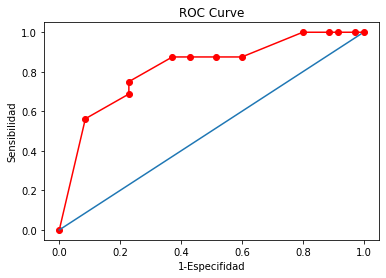

In [128]:
%matplotlib inline
plt.plot(especifity_1,sensitivity, marker='o', color='r')
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.title('ROC Curve')
plt.xlabel('1-Especifidad')
plt.ylabel('Sensibilidad')

In [129]:
from sklearn import metrics

In [130]:
espc_1, sens, _ = metrics.roc_curve(Y_test, prob)

In [131]:
df = pd.DataFrame({
    'x' : espc_1,
    'y' : sens    
})

In [132]:
df.head(2)

,x,y
0,0.0,0.0000
1,0.0,0.0625


In [133]:
auc = metrics.auc(especifity_1,sensitivity)
auc

0.8169642857142856

# Validation without splitting the dataset

In [134]:
lm = linear_model.LogisticRegression()
lm.fit(new_bmd[X], new_bmd[Y])

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
probs = lm.predict_proba(new_bmd[X])
prob = probs[:,1]

In [136]:
len(new_bmd[X])

169

In [137]:
prob_df = pd.DataFrame(prob) 
threshold = 0.50
prob_df["prediction"] = np.where(prob_df[0]>= threshold, 1, 0)
prob_df['actual'] = new_bmd[Y]

In [138]:
confussion_matrix = pd.crosstab(prob_df["prediction"], prob_df["actual"])
confussion_matrix

actual,0,1
prediction,,
0,115,23
1,4,27


In [139]:
TN = confussion_matrix[0][0]
TP = confussion_matrix[1][1]
FP = confussion_matrix[0][1]
FN = confussion_matrix[1][0]

In [140]:
sens = TP / (TP+FN)
sens

0.54

In [141]:
espc_1 = 1 - (TN / (TN+FP))
espc_1

0.03361344537815125

In [142]:
Overall_performance = (TP + TN) / (FP + FN + TP + TN)
Overall_performance

0.8402366863905325

In [143]:
threshold = [0.04, 0.05, 0.07, 0.10, 0.12,0.15, 0.18, 0.20, 0.25, 0.3, 0.37,0.4, 0.5]
sensitivity = [1]
especifity_1 = [1]

In [144]:
for t in threshold:
    prob_df["prediction"] = np.where(prob_df[0]>= t, 1, 0)
    prob_df["actual"] = new_bmd[Y]
    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    sens = TP / (TP+FN)
    espc_1= 1-TN/(TN+FP)
    sensitivity.append(sens)
    especifity_1.append(espc_1)

In [145]:
sensitivity.append(0)
especifity_1.append(0)

In [146]:
sensitivity

[1,
 1.0,
 1.0,
 1.0,
 1.0,
 0.94,
 0.92,
 0.88,
 0.88,
 0.86,
 0.78,
 0.72,
 0.66,
 0.54,
 0]

In [147]:
especifity_1

[1,
 0.9831932773109243,
 0.9663865546218487,
 0.9159663865546218,
 0.8403361344537815,
 0.7563025210084033,
 0.680672268907563,
 0.5042016806722689,
 0.4453781512605042,
 0.31932773109243695,
 0.2016806722689075,
 0.12605042016806722,
 0.10924369747899154,
 0.03361344537815125,
 0]

In [148]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sensibilidad')

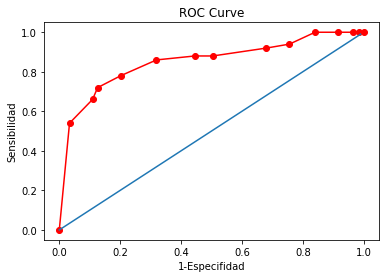

In [149]:
%matplotlib inline
plt.plot(especifity_1,sensitivity, marker='o', color='r')
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.title('ROC Curve')
plt.xlabel('1-Especifidad')
plt.ylabel('Sensibilidad')

In [150]:
from sklearn import metrics

In [151]:
espc_1, sens, _ = metrics.roc_curve(new_bmd[Y], prob)

In [152]:
df = pd.DataFrame({
    'x' : espc_1,
    'y' : sens    
})

In [153]:
auc = metrics.auc(especifity_1,sensitivity)
auc

0.8510084033613445

# Adding results to original dataset

In [154]:
bmd['Prediction'] = new_bmd['Prediction']
bmd.head()

,age,sex,weight_kg,height_cm,medication,waiting_time,bmd,fracture,Prediction
0,57.052768,F,64.0,155.5,Anticonvulsant,18,0.8793,no fracture,0
1,75.741225,F,78.0,162.0,No medication,56,0.7946,no fracture,0
2,70.778900,M,73.0,170.5,No medication,10,0.9067,no fracture,0
3,78.247175,F,60.0,148.0,No medication,14,0.7112,no fracture,0
4,54.191877,M,55.0,161.0,No medication,20,0.7909,no fracture,0


In [155]:
bmd['Prediction'] = bmd['Prediction'].replace(0, 'no fracture')
bmd['Prediction'] = bmd['Prediction'].replace(1, 'fracture')

In [156]:
bmd.head()

,age,sex,weight_kg,height_cm,medication,waiting_time,bmd,fracture,Prediction
0,57.052768,F,64.0,155.5,Anticonvulsant,18,0.8793,no fracture,no fracture
1,75.741225,F,78.0,162.0,No medication,56,0.7946,no fracture,no fracture
2,70.778900,M,73.0,170.5,No medication,10,0.9067,no fracture,no fracture
3,78.247175,F,60.0,148.0,No medication,14,0.7112,no fracture,no fracture
4,54.191877,M,55.0,161.0,No medication,20,0.7909,no fracture,no fracture


In [157]:
bmd['Result'] = bmd['fracture']==bmd['Prediction'] 
bmd.head()

,age,sex,weight_kg,height_cm,medication,waiting_time,bmd,fracture,Prediction,Result
0,57.052768,F,64.0,155.5,Anticonvulsant,18,0.8793,no fracture,no fracture,True
1,75.741225,F,78.0,162.0,No medication,56,0.7946,no fracture,no fracture,True
2,70.778900,M,73.0,170.5,No medication,10,0.9067,no fracture,no fracture,True
3,78.247175,F,60.0,148.0,No medication,14,0.7112,no fracture,no fracture,True
4,54.191877,M,55.0,161.0,No medication,20,0.7909,no fracture,no fracture,True


In [158]:
bmd['Result'].value_counts()

True     142
False     27
Name: Result, dtype: int64

In [159]:
# Renaming columns

In [160]:
new_cols = ['Age',
 'Gender',
 'Weight (kg)',
 'Height (cm)',
 'Medication',
 'Densitometry Waiting_Time',
 'Bone Mineral Density',
 'Fracture (Actual)',
 'Fracture (Prediction)',
 'Prediction Result']

In [161]:
bmd.columns = new_cols

In [162]:
pd.crosstab(bmd['Fracture (Actual)'], bmd['Fracture (Prediction)'])

Fracture (Prediction),fracture,no fracture
Fracture (Actual),,
fracture,27,23
no fracture,4,115


In [163]:
bmd.head()

,Age,Gender,Weight (kg),Height (cm),Medication,Densitometry Waiting_Time,Bone Mineral Density,Fracture (Actual),Fracture (Prediction),Prediction Result
0,57.052768,F,64.0,155.5,Anticonvulsant,18,0.8793,no fracture,no fracture,True
1,75.741225,F,78.0,162.0,No medication,56,0.7946,no fracture,no fracture,True
2,70.778900,M,73.0,170.5,No medication,10,0.9067,no fracture,no fracture,True
3,78.247175,F,60.0,148.0,No medication,14,0.7112,no fracture,no fracture,True
4,54.191877,M,55.0,161.0,No medication,20,0.7909,no fracture,no fracture,True


In [164]:
bmd.to_excel('bmd_logistic_regression.xlsx')

In [165]:
X

['age', 'medication_No medication', 'waiting_time', 'bmd']